In [1]:
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def linear_model(n, a, b):
    return a*n + b

xs = [100, 1_000, 10_000]
ys = [0.063, 0.565, 5.946]

[(a, b), _] = curve_fit(linear_model, np.array(xs), np.array(ys))
print(f'Linear = {a} * N + {b}')

Linear = 0.0005957207206208581 * N + -0.012833332413134054


In [37]:
def bsearch(sorted_array, target):
    low = 0
    high = len(sorted_array) - 1

    while low <= high:
        mid = (low + high) // 2
    
        if target < sorted_array[mid]:
            high = mid - 1
        elif target > sorted_array[mid]:
            low = mid + 1
        else:
            return mid
    return -(low + 1)


def bsearch2(sorted_array, target):
    low = 0
    high = len(sorted_array) - 1

    while low <= high:
        mid = (low + high) // 2
        diff = target - sorted_array[mid]
    
        if diff < 0:
            high = mid -1
        elif diff > 0:
            low = mid + 1
        else:
            return mid
    return -(low + 1)

import timeit


# Test setup for timeit
def test_bsearch():
    sorted_array = list(range(1000000))  # A sorted list of 1 million integers
    target = 999999                      # Target to search for (last element)
    bsearch(sorted_array, target)

def test_bsearch2():
    sorted_array = list(range(1000000))  # A sorted list of 1 million integers
    target = 999999                      # Target to search for (last element)
    bsearch2(sorted_array, target)

# Run the timeit tests
bsearch_time = timeit.timeit("test_bsearch()", setup="from __main__ import test_bsearch", number=100)
bsearch2_time = timeit.timeit("test_bsearch2()", setup="from __main__ import test_bsearch2", number=100)

print(f"bsearch time: {bsearch_time} seconds")
print(f"bsearch2 time: {bsearch2_time} seconds")

bsearch time: 2.456797799999549 seconds
bsearch2 time: 2.228270800000246 seconds


In [33]:
bsearch([1,2,3,4,5,6,7], 1.1)

-2

In [68]:
def f4(N):
    ct = 1
    
    while N >= 2:
        ct=ct+1
        N=N**0.5
    
    return ct

vectorized_f4 = np.vectorize(f4)

array_n = 2 ** np.arange(2, 51)
array_result = vectorized_f4(array_n)

In [69]:
def model(N, a):
    return a * (np.log2(np.log2(N)))

popt, pcov = curve_fit(model, array_n, array_result)

In [70]:
popt, pcov

(array([1.33388173]), array([[0.00026552]]))

In [97]:
from itertools import permutations
from scipy.special import factorial

def factorial_model(n, a):
    return a*factorial(n)

def check_sorted(a):
    for i, val in enumerate(a):
        if i > 0 and val < a[i-1]:
            return False
    return True

def permutation_sort(A):
    for attempt in permutations(A):
        if check_sorted(attempt):
            A[:] = attempt[:]
            
            return A
        

In [98]:
nums = [8, 7, 6, 5, 4, 3, 2, 1, 0, -1]
permutation_sort(nums)

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [100]:
array_nums_list = []

for i in range(1, 12):
    array_nums_list.append(np.arange(i, 0, -1))

array_nums = np.array(array_nums_list, dtype=object)

print(array_nums)

[array([1]) array([2, 1]) array([3, 2, 1]) array([4, 3, 2, 1])
 array([5, 4, 3, 2, 1]) array([6, 5, 4, 3, 2, 1])
 array([7, 6, 5, 4, 3, 2, 1]) array([8, 7, 6, 5, 4, 3, 2, 1])
 array([9, 8, 7, 6, 5, 4, 3, 2, 1])
 array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])
 array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])]


In [103]:
import time

results = []

for a in array_nums:
    start_time = time.time()
    permutation_sort(a)       
    elapsed_time = time.time() - start_time
    
    results.append(elapsed_time)

print(results)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008950233459472656, 0.016147136688232422, 0.13187098503112793, 1.4264640808105469, 15.347145318984985]


In [107]:
a_list, _ = curve_fit(factorial_model, np.arange(1, 12), np.array(results))

In [109]:
a = a_list[0]

In [114]:
(a * factorial(20)) / 60 / 60 / 24 / 365

np.float64(29666.596769544405)

In [30]:
def bsearch(sorted_array, target):
    low = 0
    high = len(sorted_array) - 1

    while low <= high:
        mid = (low + high) // 2
        diff = target - sorted_array[mid]
    
        if diff < 0:
            high = mid -1
        elif diff > 0:
            low = mid + 1
        else:
            return mid
    return -(low + 1)

In [78]:
import numpy as np
import timeit
import pandas as pd


def trial_bsearch(N, times_to_run=1000):
    # Step 1: Randomly select N values in sorted order from np.arange(4*N)
    sorted_array = np.random.choice(np.arange(4*N), size=N, replace=False)
    sorted_array = np.sort(sorted_array)
    
    total_elapsed_time = 0
    
    for _ in range(times_to_run):
        # Step 2: Choose a random number from 0 to 4*N
        target = np.random.randint(0, 4*N)
        
        # Step 3: Run bsearch and time the result
        start_time = timeit.default_timer()
        index = bsearch(sorted_array, target)
        total_elapsed_time += timeit.default_timer() - start_time

    return total_elapsed_time

In [79]:
results = []

for x in range(1,23):
    N = 2**x
    elapsed_time = trial_bsearch(N)

    results.append({'N**': N, 'Elapsed Time (seconds)': elapsed_time})

df_results = pd.DataFrame(results)

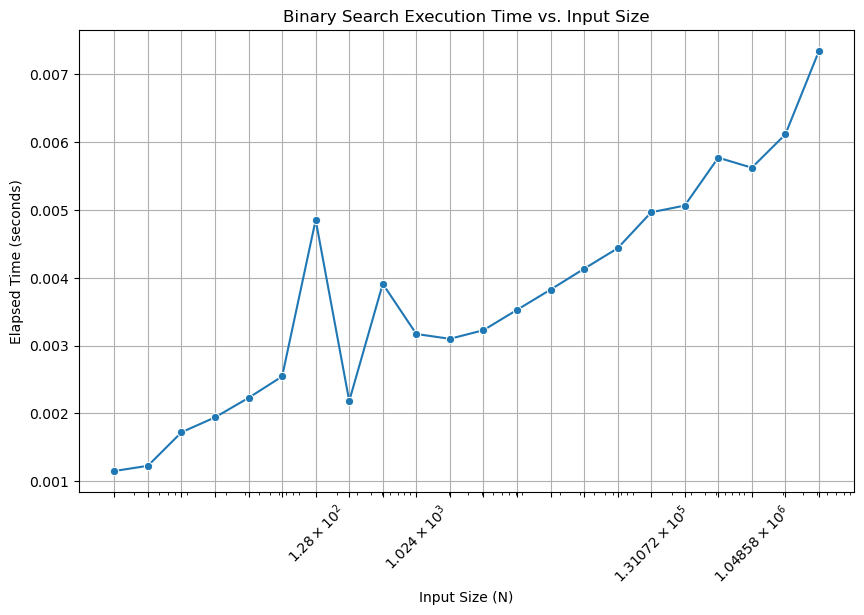

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='N**', y='Elapsed Time (seconds)', data=df_results, marker='o')
plt.xscale('log')  # Use a logarithmic scale for the x-axis

plt.title('Binary Search Execution Time vs. Input Size')
plt.xlabel('Input Size (N)')
plt.ylabel('Elapsed Time (seconds)')
plt.grid(True)
plt.xticks(df_results['N**'], rotation=45) 
plt.show()
